An example of how to add more metadata into our feature table will be given here.
We can add information such as the age of the laser spots,or its greyscale in xray measurements etc. Todo this, we need to use `CorSolver` class.

In [48]:
from mfe.util.CorSolver import CorSolver
import pandas as pd

We need to define the source triangle and the target triangle, in order to transform our (x, y) coordinate in the MSI measurements to the pixel coordinate in the X-ray measurements. For this example:

In [49]:
src_tri = [[64, 21], [175, 92], [302, 26]]
dst_tri = [[30, 1188], [354, 1732], [20, 2332]]

In [50]:
feature_table = pd.read_csv(r'./SBB5-10cm_mz520-580_feature_table_w_pick_peaking.csv', index_col=False)
spot_cor = feature_table[['x', 'y']].to_numpy()
cs = CorSolver()
cs.fit(src_tri, dst_tri)
px_cor = cs.transform(spot_cor)

Then we can add the pixel coordinates in the feature_table

In [51]:
feature_table[['px', 'py']] = px_cor

Then add the greyscale measured using xray

In [52]:
import numpy as np
xray = np.genfromtxt(r'./xray/X-Ray_pixel.txt')
xray = pd.DataFrame(xray, columns=['px', 'py', 'gs'])
feature_table = feature_table.merge(xray, on=['px', 'py'])

Now we can have a look of what our data looks in xray

(-0.5, 46.5, 250.5, -0.5)

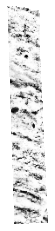

In [53]:
import matplotlib.pyplot as plt
plt.imshow(feature_table.pivot('x', 'y', 'gs'), cmap='Greys')
plt.axis('off')

After warping the layer (TODO: add a warping function), we can get the depth of each laser spot.

In [54]:
xray = np.genfromtxt(r'./xray/X-Ray_pixel.txt')[:, 0:2]
xray_warped = np.genfromtxt(r'./xray/X-Ray_pixel_warped.txt')[:, 0:2]
depth = np.genfromtxt(r'./xray/X-Ray_depth.txt')[:, 1]
A = pd.DataFrame(np.hstack([xray, xray_warped, depth.reshape(-1, 1)]), columns=['px', 'py','wpx', 'wpy', 'depth'])
feature_table = feature_table.merge(A, on=['px', 'py'])

And now we can save the feature table with more metadata for later analysis

In [58]:
feature_table = feature_table.to_csv('./SBB5-10cm_mz520-580_feature_table_w_metadata.csv', index=False)